In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import os

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.optim import Adam, SGD
from torch.utils.data import Dataset, DataLoader

from sklearn.metrics import *
from sklearn.linear_model import LassoCV
#Transformers
from module import *

In [2]:
# Load training data set (small amount to test if it works first)

xtrain = r"data/training_sample_3s.csv.gz"
ytrain = r"data/training_label_3s.csv.gz"
xtest = r"data/testing_sample2_3s.csv.gz"
ytest = r"data/testing_label_3s.csv.gz"

In [3]:
#check balance

samplesdf = pd.DataFrame()
for df in  pd.read_csv(xtrain,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
x_train = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(ytrain,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
y_train = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(xtest,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
x_test = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(ytest,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
y_test = samplesdf.to_numpy()

num0 = 0
num1 = 0
for x in y_train:
    if x == 0:
        num0 = num0 + 1
    else:
        num1 = num1 + 1
num0,num1 #checking if it is balanced

(16613, 15417)

In [4]:
y_train = y_train.reshape(-1)
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(3551, 3148)
(3551, 1)
(32030, 3148)
(32030,)


In [5]:
# Hyper Parameters
EPOCH = 20             # train the training data n times, to save time, we just train 1 epoch
LR = 0.0001              # learning rate
batch_size = 32
wd = LR / EPOCH

In [6]:
reg = LassoCV(cv=5, random_state = 0).fit(x_train,y_train)
print("done")


done


C:\Users\good6\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.904433579194574, tolerance: 0.7996335341867008
  model = cd_fast.enet_coordinate_descent(


In [7]:
testresult = reg.predict(x_test)
trainresult = reg.predict(x_train)
for x in testresult:
    print(x)

0.4117941692250655
-0.07191486435736999
0.49444133075181707
0.5845370843949601
0.42188781574153855
0.12996365865033144
0.5866558997114947
0.5901916796632615
0.18289637162527245
1.0860664823642825
0.7115926226015785
0.5812059382825467
0.6133201633811188
0.2167365171006913
0.8508150114718344
0.8907652252150678
0.7930723757986814
0.584691868159694
0.6247866377307993
0.3283972747730203
0.12078817267246428
0.5752969784193454
0.707171827744887
-0.21786619260313092
0.5842674353328519
0.6333589518163714
0.940042069618437
0.4868019465078285
0.38352546853852343
0.6288856942406069
0.11035398570906879
0.3051590524617188
1.1019985861176318
0.3821936203221157
0.2350615022793573
0.4108748245434106
0.17383238869228484
0.29995947025852276
0.906086713955428
0.2571491075716059
0.47858192874195227
0.6888961275986061
0.5662215237035046
1.0212208459027563
0.2422739310353178
-0.048284219065677814
0.440862981416261
-0.016633628870106304
0.03611712777787768
0.07245691956526756
0.3143195214666249
-0.13082796561

0.9528476855946221
0.4327497181734016
0.25529284345012904
0.7305936876686635
0.7355011910079756
0.3658209369437079
0.4185676796144536
0.01285936595507059
0.30146520911251873
0.15078724993214243
0.6221266728448165
0.6624461204549458
0.435051854108614
1.218865311701959
-0.049797809296105666
0.4920957812684258
0.2198743823479864
0.7032086235225101
0.9151935407787867
0.3598297854617396
0.7479396762575462
0.3462760967416295
0.7172114757996532
0.004740916864522382
0.4428327024601709
0.22601444046980207
0.4942246130949224
0.903008592430386
0.07298154064627482
0.5346964784530793
0.5501417522245774
0.17951361522456577
0.7626466318819599
1.1207021501342682
0.6482958198639591
0.42484884262822353
0.5611819606262392
0.6796075602073017
0.697578306304347
0.361507377030568
0.23007780454366483
0.9124979126548852
0.4477819867914744
0.7804649300121803
0.7865792322065351
1.2390422748530217
1.1541544312283203
0.7971606331782092
0.8760332154331322
0.6504864573068629
0.1256088444907268
0.33655375534747256
0.

In [8]:
i = 0
correct = 0
for x in trainresult:
    if x >=0.5 and y_train[i] == 1:
        correct = correct + 1
    elif x < 0.5 and y_train[i] == 0:
        correct = correct + 1
    i = i + 1
trainacc = correct/i
i = 0
correct = 0
for x in testresult:
    if x >=0.5 and y_test[i] == 1:
        correct = correct + 1
    elif x < 0.5 and y_test[i] == 0:
        correct = correct + 1
    i = i + 1
testacc = correct/i
trainacc,testacc

(0.8619107087105838, 0.8375105604055195)

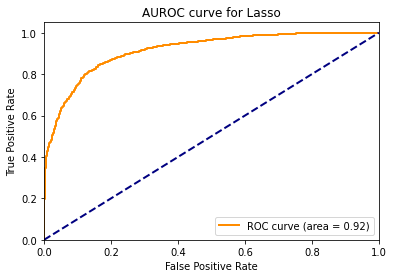

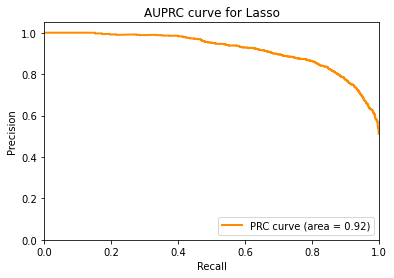

AUPRC = 0.92
f1_score = 0.83


In [9]:
fpr, tpr, _ = roc_curve(y_test,testresult)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr,tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC curve for Lasso')
plt.legend(loc="lower right")
plt.show()
precision, recall, _ = precision_recall_curve(y_test,testresult)
prc_auc = auc(recall,precision)
plt.plot(recall,precision, color='darkorange',
         lw=lw, label='PRC curve (area = %0.2f)' % prc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('AUPRC curve for Lasso')
plt.legend(loc="lower right")
plt.show()
print("AUPRC = %.02f"% prc_auc)
ss = np.zeros((len(testresult)))
i = 0
for x in testresult:
    if x >= 0.5:
        ss[i] = 1
    else:
        ss[i] = 0
    i = i + 1
f1s = f1_score(y_test,ss)
print("f1_score = %.02f"% f1s)
df = pd.DataFrame(y_test)
df.to_csv(r"data/lassolb.csv.gz",index=False,sep=",",compression="gzip")
df = pd.DataFrame(testresult)
df.to_csv(r"data/lassopredict.csv.gz",index=False,sep=",",compression="gzip")
